In [171]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error,roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('/kaggle/input/heartdata/heart.csv')
# df.head()
X = df.drop('target', axis=1)
y = df['target']
print(df.shape, X.shape, y.shape)

(1025, 14) (1025, 13) (1025,)


In [173]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [174]:
print("No. of rows in data: ", len(df))

No. of rows in data:  1025


In [175]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


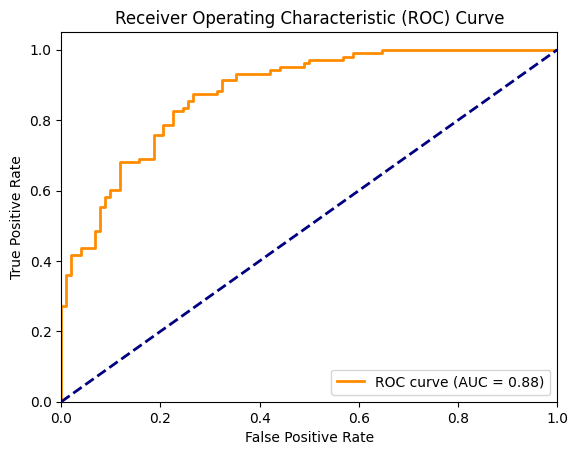

In [177]:
# building roc curve
y_true = y_test  # True labels (actual target values)
y_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_true, y_prob)

# Create the ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [178]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Accuracy percentage: {accuracy * 100:.2f}%")
print(f"Accuracy: {accuracy}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Accuracy percentage: 79.51%
Accuracy: 0.7951219512195122
Mean Squared Error (MSE): 0.20


In [179]:
# Display a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [180]:
# Display a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[73 29]
 [13 90]]
